## 📖 Background
The Netflix Top 10 charts represent the most popular movies and TV series, with millions of viewers around the globe. Understanding what makes the biggest hits is crucial to making more hits.

## 💪 Challenge
Explore the dataset to understand the most common attributes of popular Netflix content. Your published notebook should contain a short report on the popular content, including summary statistics, visualizations, statistical models, and text describing any insights you found.

## 💾 The data
There are three datasets taken from [Netflix Top 10](https://top10.netflix.com).
- `all_weeks_global`: This contains the weekly top 10 list for movies (films) and TV series at a global level.
- `all_weeks_countries`: This contains the weekly top 10 list for movies (films) and TV series by country.
- `most_popular`: All-time most popular content by number of hours viewed in the first 28 days from launch.

# Top Weekly Global Movies on Netflix 

In [21]:
# create a dataframe named named world from all_weeks_global postgresql table
import pandas as pd
df = pd.read_csv('all-weeks-global.csv')
world  = df
world.head(5)

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2023-03-26,Films (English),1,Luther: The Fallen Sun,NaN,24700000,3
1,2023-03-26,Films (English),2,The Magician's Elephant,NaN,16730000,2
2,2023-03-26,Films (English),3,I See You,NaN,10830000,1
3,2023-03-26,Films (English),4,Dragged Across Concrete,NaN,9310000,2
4,2023-03-26,Films (English),5,Money Shot: The Pornhub Story,NaN,5000000,2


In [22]:
# find the total number of rows and columns

world.shape

(3640, 7)

In [23]:
# any missing values?

world.isna().sum()

week                             0
category                         0
weekly_rank                      0
show_title                       0
season_title                  1879
weekly_hours_viewed              0
cumulative_weeks_in_top_10       0
dtype: int64

In [24]:
# dropping missing values

world.dropna(inplace = True)

In [25]:
# display max number of rows
pd.set_option('display.max_rows', None)

world.dtypes

week                          object
category                      object
weekly_rank                    int64
show_title                    object
season_title                  object
weekly_hours_viewed            int64
cumulative_weeks_in_top_10     int64
dtype: object

In [26]:
# changing datatype of week to datetime
world['week'] = world['week'].apply(pd.to_datetime)

In [27]:
pd.set_option('display.max_rows', None)

world.dtypes

week                          datetime64[ns]
category                              object
weekly_rank                            int64
show_title                            object
season_title                          object
weekly_hours_viewed                    int64
cumulative_weeks_in_top_10             int64
dtype: object

In [28]:
# Checking min and max date of data
print(world.week.min())
print(world.week.max())

2021-07-04 00:00:00
2023-03-26 00:00:00


In [29]:
len(world.week.value_counts())

91

## This data was derived for over a period of 91 weeks (637 days) from 2021-07-04 to 2023-03-26

## Most watched category  worldwide in descending order

In [30]:
world.groupby(['category'])['weekly_hours_viewed'].mean().round().sort_values(ascending = False).reset_index()

,category,weekly_hours_viewed
0,TV (English),35681998.0
1,TV (Non-English),22284171.0
2,Films (Non-English),3160000.0


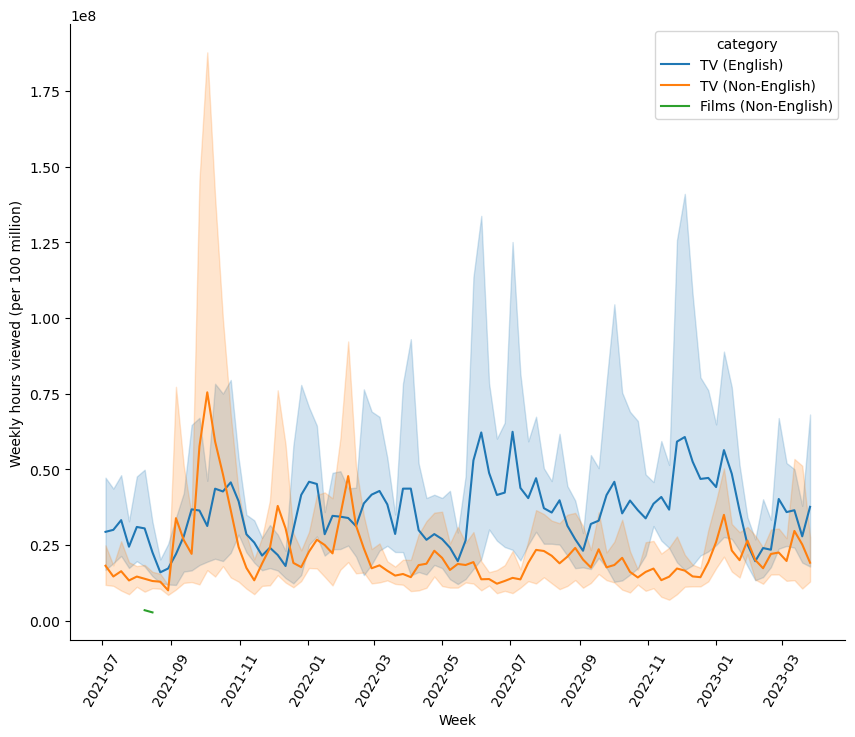

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize = (10,8))
sns.lineplot(x='week', y = 'weekly_hours_viewed', hue = 'category',  data = world)
plt.ylabel('Weekly hours viewed (per 100 million)')
plt.xlabel ('Week')
plt.xticks (rotation = 60)
sns.despine()

### From the table and graph depicted above, the top most viewed categories in descending order are 
1. TV (English) 
2. TV (Non-English)
3. Films (English) 
3. Films (Non-English) 

## Top 10 TV shows with the most weekly hours viewed worldwide

In [32]:
top_TV_shows = world.groupby(['season_title', 'category'])['weekly_hours_viewed'].mean().round().sort_values(ascending = False)[:10]
top_TV_shows = top_TV_shows.reset_index()
top_TV_shows

,season_title,category,weekly_hours_viewed
0,The Night Agent: Season 1,TV (English),168710000.0
1,DAHMER: Monster: The Jeffrey Dahmer Story,TV (English),137495714.0
2,Squid Game: Season 1,TV (Non-English),114475000.0
3,Wednesday: Season 1,TV (English),104369412.0
4,Stranger Things 4,TV (English),99332105.0
5,The Witcher: Season 2,TV (English),86581667.0
6,Ginny & Georgia: Season 2,TV (English),81215714.0
7,The Watcher: Season 1,TV (English),79006000.0
8,Sex Education: Season 3,TV (English),74625000.0
9,Cobra Kai: Season 4,TV (English),73237500.0


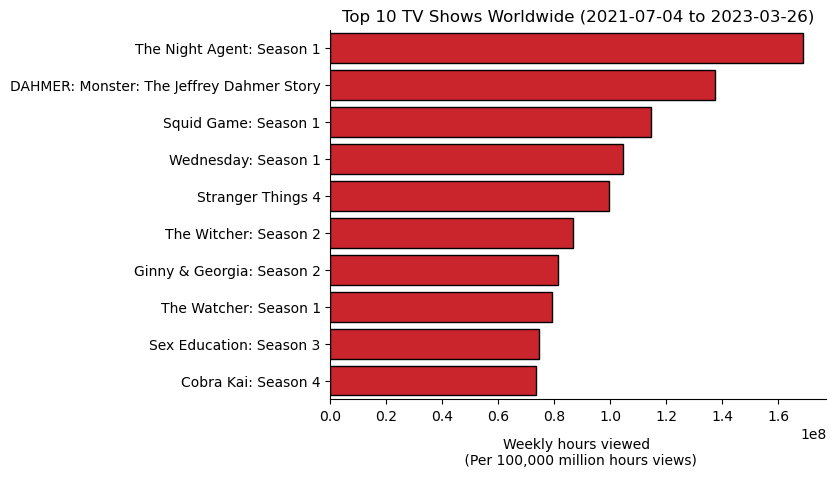

In [33]:
# Bar graph of top 10 shows on basis of views
sns.barplot(y = 'season_title', x = 'weekly_hours_viewed', color = '#E50914',edgecolor = 'black', data = top_TV_shows)
plt.title('Top 10 TV Shows Worldwide (2021-07-04 to 2023-03-26)')
plt.xlabel('Weekly hours viewed \n (Per 100,000 million hours views)', labelpad = 10)
plt.ylabel('')
sns.despine()

### The above findings so far are quite interesting: Nine out of the top 10 shows were English TV shows while only one (Squid Game) was a non-English TV show.
### It appears that globally, mankind prefers watching English TV shows.

## Average cumulative weeks in top 10 for the most popular TV shows

In [34]:
season = world[world.season_title.isin(top_TV_shows.season_title.values)]
cum = season.groupby('season_title')['cumulative_weeks_in_top_10'].mean().sort_values(ascending = False)
cum = cum.reset_index()
cum

,season_title,cumulative_weeks_in_top_10
0,Squid Game: Season 1,10.5
1,Stranger Things 4,10.0
2,Wednesday: Season 1,9.0
3,DAHMER: Monster: The Jeffrey Dahmer Story,4.0
4,Ginny & Georgia: Season 2,4.0
5,Sex Education: Season 3,3.5
6,The Witcher: Season 2,3.5
7,The Watcher: Season 1,3.0
8,Cobra Kai: Season 4,2.5
9,The Night Agent: Season 1,1.0


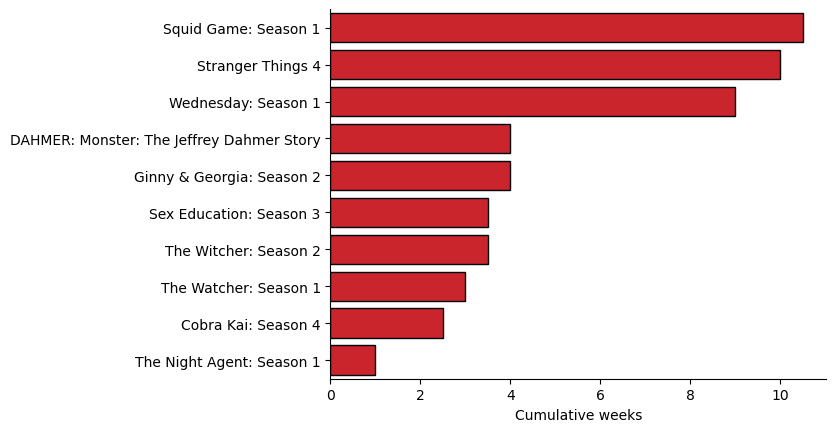

In [35]:
sns.barplot(y = 'season_title' , x = 'cumulative_weeks_in_top_10', color = '#E50914', 
            edgecolor = 'black', data = cum)
plt.ylabel('')
plt.xlabel('Cumulative weeks')
sns.despine()

### Out of the top 10 most watched shows worldwide, the show with the highest cumulative weeks as one of the top 10 watched show is Squid game: Season 1 with an average of 10.5 weeks which is fascinating particularly since The Night Agent : Season 1 which is the most watched show had only 1.5 cumulative weeks and Ginny & Georgia: Season 2 only 4.

In [36]:
most_popular = pd.read_csv('most-popular.csv')
most_popular.head(5)

,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,NaN,364020000
1,Films (English),2,Don't Look Up,NaN,359790000
2,Films (English),3,Bird Box,NaN,282020000
3,Films (English),4,Glass Onion: A Knives Out Mystery,NaN,279740000
4,Films (English),5,The Gray Man,NaN,253870000


In [37]:
country = pd.read_csv('all-weeks-countries.csv')
country.head(5)

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2023-03-26,Films,1,Still Time,NaN,2
1,Argentina,AR,2023-03-26,Films,2,In His Shadow,NaN,2
2,Argentina,AR,2023-03-26,Films,3,Luther: The Fallen Sun,NaN,3
3,Argentina,AR,2023-03-26,Films,4,Noise,NaN,2
4,Argentina,AR,2023-03-26,Films,5,All Quiet on the Western Front,NaN,6


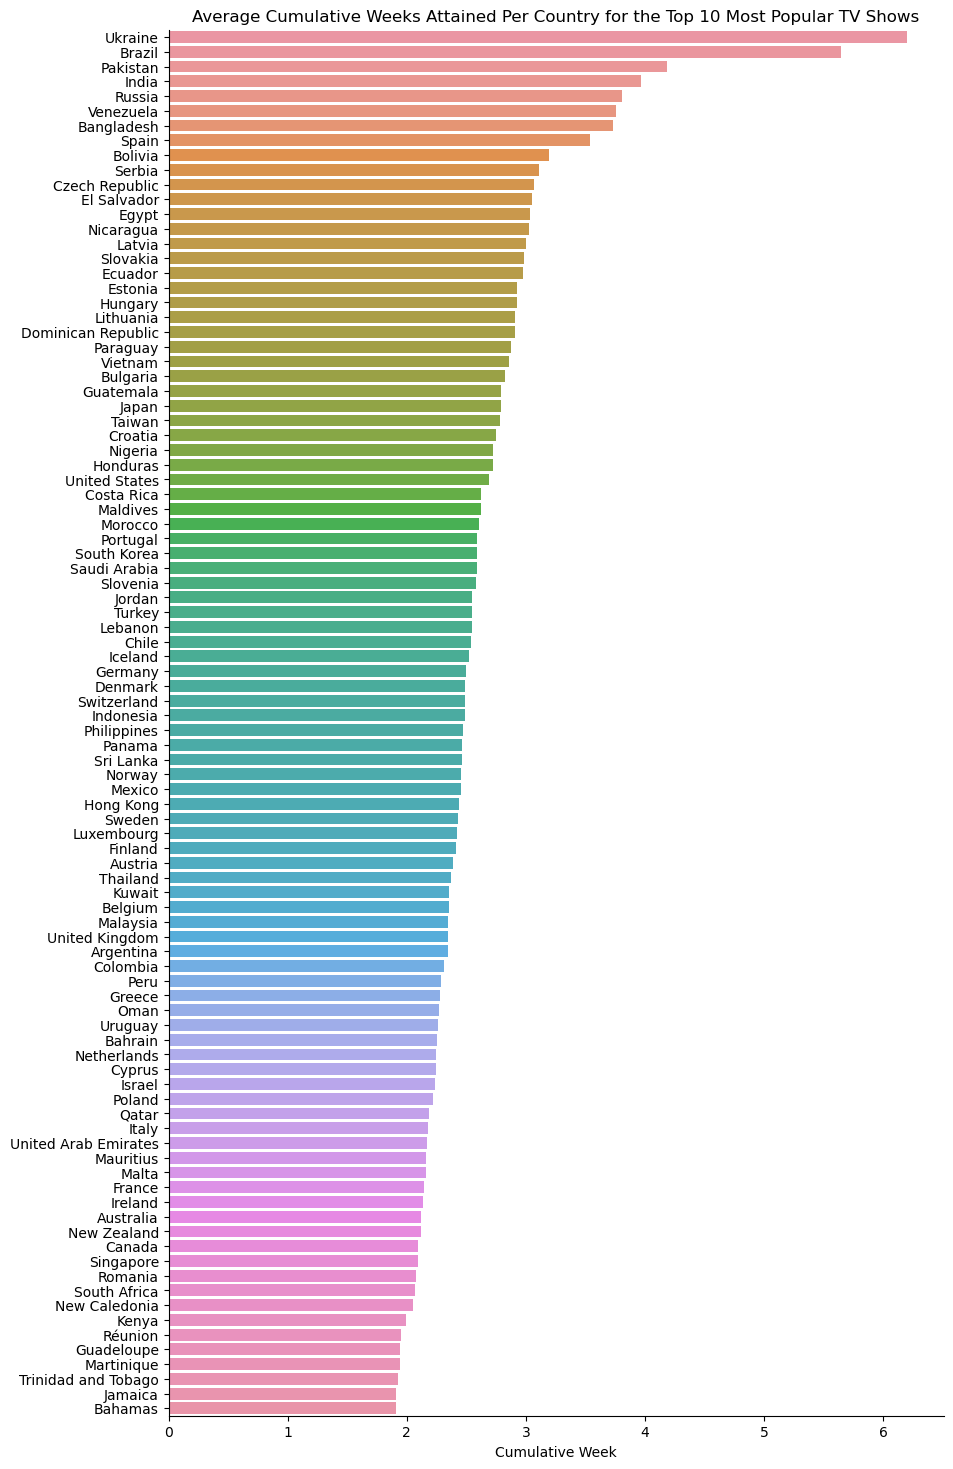

In [38]:
#select the rows with the top 10 most popular TV shows 

country_most_popular_TV = country[country.season_title.isin(most_popular.season_title.values)]

plt.figure (figsize = (10,18))
sns.barplot(x = 'cumulative_weeks_in_top_10', y = 'country_name', data = country_most_popular_TV.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values( ascending = False).reset_index())
plt.title('Average Cumulative Weeks Attained Per Country for the Top 10 Most Popular TV Shows')
plt.ylabel('')
plt.xlabel ('Cumulative Week')
sns.despine()

### It appears that the top 10 countries that enjoyed the top 10 most popular TV shows the most were 
1. Ukrine
2. Brazil
3. Pakistan
4. India
5. Russia
6. Venezeula
7. Bangladesh
8. Spain
9. Bolivia
10. Servia

### While the countries that barely watched the top 10 most popular TV shows were 
1. Bahamas
2. Jamica
3. Trinidad and togobo
4. Martinique
5. Gaudeloupe
6. Reunion
7. Kenya
8. New Caledonia
9. South Africa
10. Romania

## Which TV show performed best per country?

In [39]:
country_most_popular_TV = country[country.season_title.isin(most_popular.season_title.values)]
final_TV = country_most_popular_TV.groupby(['country_name','season_title'])[['weekly_rank','cumulative_weeks_in_top_10']].mean().round()
final_TV = final_TV.reset_index()
final_TV.sort_values(['cumulative_weeks_in_top_10'], ascending = [False]).reset_index(drop=True)

,country_name,season_title,weekly_rank,cumulative_weeks_in_top_10
0,Venezuela,Café con aroma de mujer: Season 1,5.0,32.0
1,Spain,Café con aroma de mujer: Season 1,5.0,28.0
2,Dominican Republic,Café con aroma de mujer: Season 1,5.0,25.0
3,Nicaragua,Café con aroma de mujer: Season 1,6.0,25.0
4,El Salvador,Café con aroma de mujer: Season 1,6.0,24.0
5,Ecuador,Café con aroma de mujer: Season 1,6.0,24.0
6,Paraguay,Café con aroma de mujer: Season 1,5.0,23.0
7,Honduras,Café con aroma de mujer: Season 1,6.0,21.0
8,Guatemala,Café con aroma de mujer: Season 1,5.0,20.0
9,Ukraine,Inventing Anna: Limited Series,6.0,19.0


In [40]:
# This list cointains the TV shows which is most popular country wise

## And this concludes my review. English TV shows were very popular globally but one TV show Squid Game really  outperformed them all particularly when a standard metric was used.

## The country which spend most time for the top shows are Ukrine, Brazil, Pakistan and India whereas Bahamas, Jamica, Trinidad and togobo spend least time for the most popular TV shows

### Thank you